Nama : Andhika Bayu P NIM : 201351014 Kelas : Informatika Pagi B


1. BUSINES UNDERSTANDING

    Analisis Iris adalah sebuah studi yang dilakukan untuk memahami dan menganalisis karakteristik dari bunga Iris. Bunga Iris merupakan jenis bunga yang populer digunakan dalam analisis data dan pembelajaran mesin karena memiliki variasi yang jelas dalam karakteristik morfologisnya. Analisis Iris dapat memberikan wawasan yang berharga dalam berbagai bidang, seperti biologi, botani, ekologi, serta ilmu data dan pembelajaran mesin.Analisis Iris dapat digunakan untuk mengklasifikasikan dan mengidentifikasi spesies bunga Iris berdasarkan atribut-atribut seperti panjang dan lebar sepal serta petal. Hal ini dapat membantu dalam pengenalan dan penamaan bunga Iris, baik dalam industri hortikultura, perdagangan bunga, maupun penelitian botani.

    Dataset :(https://www.kaggle.com/datasets/saurabh00007/iriscsv)

2. Data Understanding
    Dataset Iris memiliki detail sebagai berikut:

    Id = Number
    SepalLengthCm = Panjang Sepal menurut cm
    SepalWidthCm = Lebar Sepal menurut cm
    PetalLengthCm = Panjang Petal menurut cm
    PetalWidthCm = Lebar Petal menurut cm
    Species = Spesies bunga iris

3. Data Preparation
    Tahap ini secara garis besar di pakai untuk memperbaiki masalah dalam data, sangat jelas bahwa dalam tahap ini membutuhkan pemikiran yang cukup matang dan usaha yang cukup tinggi untuk memastikan data tepat untuk algoritma yang digunakan dan proses data dapat menuju model berkualitas yang berguna. Terdapat 6 data  dengan 2 atribut dengan tipe data yang digunakan yaitu numeric dan artibut data yang diambil yaitu : Sepal_Width dan Sepal_Length.

4. Modelling
    Tahap modelling dalam Clustering Customers adalah proses pembuatan model atau algoritma machine learning yang dapat digunakan untuk menganalisis data pelanggan secara rinci.

5. Evaluasi
    Pada tahap evaluasi, kita dapat menggunakan metrik-metrik ini untuk mengevaluasi kualitas clustering yang dihasilkan dari model atau algoritma yang telah dibangun. Perlu diingat bahwa evaluasi harus dilakukan dengan mempertimbangkan tujuan bisnis dan konteks data yang spesifik.Saat menggunakan dataset pelanggan toko yang telah dijelaskan sebelumnya, kita dapat menerapkan algoritma clustering seperti K-Means, Hierarchical Clustering, atau algoritma lain yang sesuai untuk mendapatkan clustering yang optimal. Setelah itu, kita dapat menggunakan metrik evaluasi dan visualisasi untuk mengevaluasi kualitas dan interpretasi dari hasil clustering tersebut.

#Import library yang dibutuhkan

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Membaca Dataset

In [62]:
df = pd.read_csv('Iris.csv')

In [63]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#Persiapan Dataset

In [64]:
df.rename(index=str, columns={
    'SepalLengthCm' : 'Sepal_Length',
    'SepalWidthCm' : 'Sepal_Width',
    'PetalLengthCm' : 'Petal_Length',
    'PetalWidthCm' : 'Petal_Width'
},inplace=True)

In [65]:
X = df.drop(['Id','Species'],axis=1)

In [66]:
print(X)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


#Menentukan jumlah cluster dengan Elbow

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

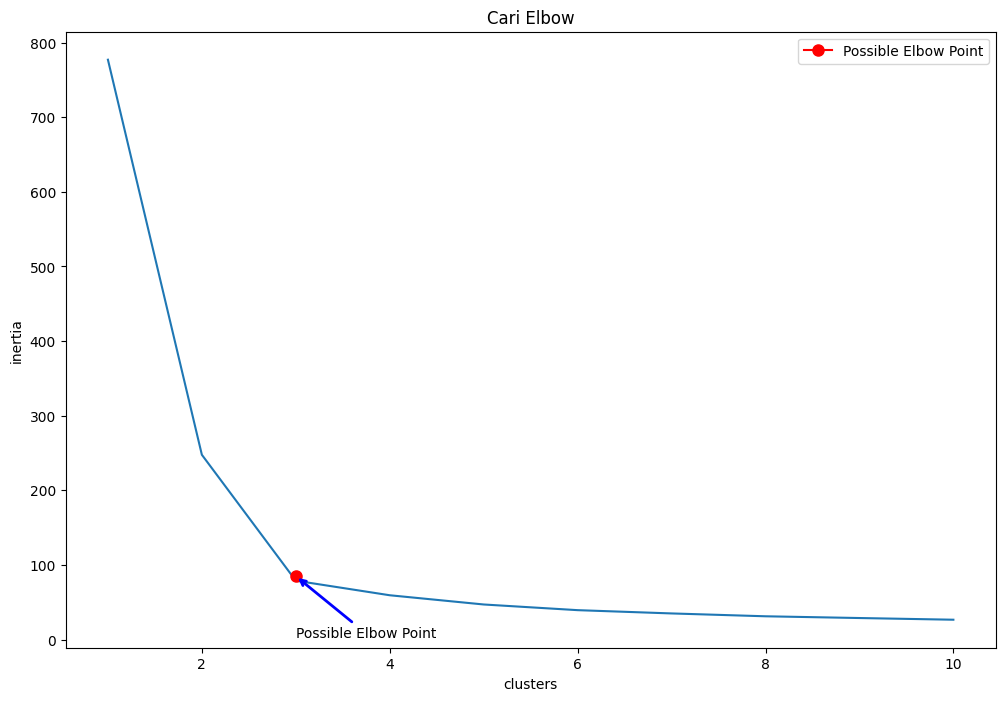

In [82]:
clusters=[]
for i in range(1,11):
    km = KMeans (n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

# Find the elbow point
elbow_point = None
for i in range(1, len(clusters) - 1):
    slope = clusters[i] - clusters[i + 1]
    if elbow_point is None or slope < elbow_point[1]:
        elbow_point = (i + 1, slope)

# Mark the elbow point on the plot
plt.plot(3, 85, marker='o', markersize=8, color='red', label='Possible Elbow Point')
plt.legend()

#Panah
ax.annotate('Possible Elbow Point', xy=(3, 85), xytext=(3, 3),
                     arrowprops=dict(color='blue', arrowstyle='->', lw=2))

# Display the plot
plt.show()

#Proses clustering

In [70]:
n_clust =  3
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


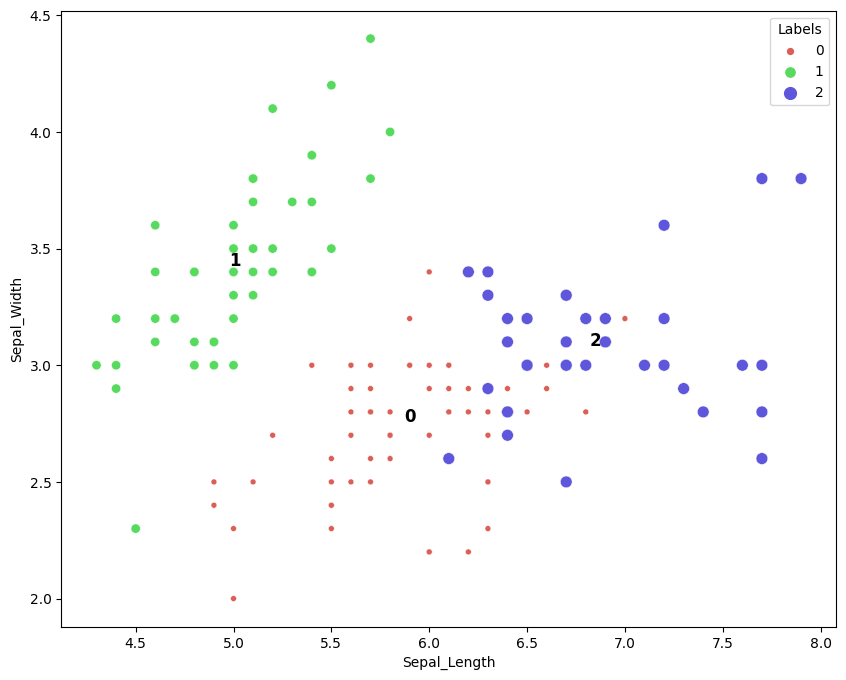

In [73]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Sepal_Length', y='Sepal_Width', hue='Labels', markers=True, size='Labels', palette=sns.color_palette('hls', n_clust), data=X)

for label in X['Labels'].unique():
    plt.annotate(label,
                 (X[X['Labels']==label]['Sepal_Length'].mean(),
                  X[X['Labels']==label]['Sepal_Width'].mean()),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center',
                 va='center',
                 size=12,
                 weight='bold',
                 color='black')
plt.show()


In [77]:
print(X)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Labels
0             5.1          3.5           1.4          0.2       1
1             4.9          3.0           1.4          0.2       1
2             4.7          3.2           1.3          0.2       1
3             4.6          3.1           1.5          0.2       1
4             5.0          3.6           1.4          0.2       1
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       0
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       0

[150 rows x 5 columns]


In [78]:
X.to_excel("output_iris.xlsx")

In [79]:
import pickle

In [80]:
pickle.dump(kmean, open('output_iriss.sav','wb'))

In [39]:
import matplotlib
import seaborn
import pandas
import seaborn as sns
import sklearn
import openpyxl

print("Versi Seaborn:", sns.__version__)
print("Versi scikit-learn:", sklearn.__version__)
print("Versi openpyxl:", openpyxl.__version__)


print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", seaborn.__version__)
print("Pandas version:", pandas.__version__)


Versi Seaborn: 0.12.2
Versi scikit-learn: 1.2.2
Versi openpyxl: 3.1.2
Matplotlib version: 3.7.1
Seaborn version: 0.12.2
Pandas version: 1.5.3
